In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 加载数据

In [2]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
data_area = df.copy().drop('Unnamed: 6',axis =1)
data_area.columns = ['time','province','city','accident','death','injury']
data_area.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


## 划分市县

In [3]:
def fitler_zone(df,zone):
    import re
    if re.search(r'(.*?{})'.format(zone), df):
        data = re.search(r'(.*?{})'.format(zone), df).group(1)
        return data
    else:
        return None

In [4]:
#统计市
data_area['zone'] = data_area['city'].apply(fitler_zone,zone = '市')
data_city = data_area[data_area['zone'].notnull()]
print(len(data_city))
data_city.head()

706


,time,province,city,accident,death,injury,zone
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,运城市
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,莆田市
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,临汾市
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,洛阳市
5,2005-01-23,广东,恩平市大槐镇路段,撞车,24.0,30.0,恩平市


In [5]:
len(data_area[data_area['zone'].isnull()])
#未被识别的数据量

147

In [6]:
#统计县
data_county = data_area[data_area['zone'].isnull()][data_area['city'].str.contains('县')]
data_county['zone'] = data_county['city'].apply(fitler_zone,zone = '县')
print(len(data_county))
data_county.head()

115


,time,province,city,accident,death,injury,zone
23,2005-03-17,重庆,奉节县新政乡苏龙寺煤矿,瓦斯爆炸,19.0,NaN,奉节县
25,2005-03-21,西藏,林芝县境内喇嘛岭路,翻车,10.0,21.0,林芝县
31,2005-04-12,四川,汶川县 S303线映 (秀 )小 (金 )路,坠入路坎,26.0,13.0,汶川县
32,2005-04-15,贵州,安龙县龙山镇龙宫煤矿,瓦斯爆炸,10.0,3.0,安龙县
34,2005-04-21,重庆,綦江县古南镇东溪化工厂乳化车间,爆炸,16.0,12.0,綦江县


In [7]:
#统计区
data_district = data_area[~data_area['city'].str.contains('市|县')][data_area['city'].str.contains('区')]
data_district['zone'] = data_district['city'].apply(fitler_zone,zone = '区')
print(len(data_district))
data_district.head()

30


,time,province,city,accident,death,injury,zone
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,南川区
33,2005-04-19,重庆,黔江区沙坝乡境内沙湾特大桥处,翻桥,27.0,4.0,黔江区
37,2005-04-29,上海,黄浦区制造局路 867弄 7号一幢 3层砖木结构房屋,火灾,10.0,20.0,黄浦区
116,2005-12-04,北京,昌平区八达岭高速公路,撞车翻沟,24.0,9.0,昌平区
176,2006-06-23,重庆,万州区白土镇谭家村附近,坠崖,14.0,8.0,万州区


In [8]:
#统计旗
data_flag = data_area[~data_area['city'].str.contains('市|县|区')][data_area['city'].str.contains('旗')]
data_flag['zone'] = data_flag['city'].apply(fitler_zone,zone = '旗')
print(len(data_flag))
data_flag

2


,time,province,city,accident,death,injury,zone
198,2006-09-20,内蒙古,科尔沁右翼前旗境内,追尾,12.0,4.0,科尔沁右翼前旗
834,2019-02-23,内蒙古,西乌珠穆沁旗银漫矿业公司,通勤车失控,22.0,NaN,西乌珠穆沁旗


In [9]:
2+30+115+706 == 853

True

In [10]:
# 数据汇总
data_zone = pd.concat([data_city,data_county,data_district,data_flag])
print(len(data_zone))
data_zone.head()

853


,time,province,city,accident,death,injury,zone
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,运城市
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,莆田市
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,临汾市
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,洛阳市
5,2005-01-23,广东,恩平市大槐镇路段,撞车,24.0,30.0,恩平市


In [11]:
#查看处理后的zone字段是否还有空值
data_zone['zone'].isna().sum()
#没有缺失值说明数据清洗完毕

0

In [12]:
#查看province里面的数据
data_zone.province.value_counts()

山西     70
贵州     59
湖南     54
云南     52
河南     49
山东     41
四川     38
广东     36
黑龙江    35
河北     33
浙江     31
辽宁     28
陕西     28
湖北     27
江苏     27
新疆     26
江西     26
重庆     24
吉林     23
安徽     20
广西     19
内蒙古    18
福建     18
甘肃     15
西藏     14
宁夏     10
天津      8
上海      8
海南      5
青海      4
北京      3
 湖南     1
 河南     1
 江苏     1
Name: province, dtype: int64

In [13]:
#清洗一下空格
data_zone['province'] = data_zone['province'].apply(lambda x: x.replace(' ',''))
print(len(data_zone.province.unique()))
data_zone.province.value_counts()
#对应了中国的31个省市区

31


山西     70
贵州     59
湖南     55
云南     52
河南     50
山东     41
四川     38
广东     36
黑龙江    35
河北     33
浙江     31
江苏     28
陕西     28
辽宁     28
湖北     27
新疆     26
江西     26
重庆     24
吉林     23
安徽     20
广西     19
内蒙古    18
福建     18
甘肃     15
西藏     14
宁夏     10
天津      8
上海      8
海南      5
青海      4
北京      3
Name: province, dtype: int64

In [14]:
def excel_concat(dir_path, obtain_path):
    '''
    Generate a xlsx-file concated by all xlsx-files under the current folder and return its contents
    '''
    import glob,os
    file_paths = glob.glob(dir_path + '/*.xlsx')
    #print(file_paths)
    df = pd.DataFrame()
    i = 1
    for file_path in file_paths:
        df_ = pd.read_excel(file_path)
        df = pd.concat([df,df_])
        print(f'Concating {i} file')
        i += 1
    df.to_excel(os.path.join(obtain_path,'concat_data.xlsx'),index = False)
    print('Concated!')
    return df

excel_concat('D:/China','D:/paper/safety/data')

Concating 1 file
Concating 2 file
Concating 3 file
Concating 4 file
Concating 5 file
Concating 6 file
Concating 7 file
Concating 8 file
Concating 9 file
Concating 10 file
Concating 11 file
Concating 12 file
Concating 13 file
Concating 14 file
Concating 15 file
Concating 16 file
Concating 17 file
Concating 18 file
Concating 19 file
Concating 20 file
Concating 21 file
Concating 22 file
Concating 23 file
Concating 24 file
Concating 25 file
Concating 26 file
Concating 27 file
Concating 28 file
Concating 29 file
Concating 30 file
Concating 31 file
Concated!


,区县,地址,地市,省份,纬度,经度
0,上海市,上海市上海市上海市,上海市,上海市,31.230370,121.474
1,黄浦区,上海市上海市黄浦区,上海市,上海市,31.231620,121.485
2,卢湾区,上海市上海市卢湾区,上海市,上海市,31.231620,121.485
3,徐汇区,上海市上海市徐汇区,上海市,上海市,31.188260,121.437
4,长宁区,上海市上海市长宁区,上海市,上海市,31.220240,121.424
5,静安区,上海市上海市静安区,上海市,上海市,31.223520,121.456
6,普陀区,上海市上海市普陀区,上海市,上海市,31.249400,121.397
7,闸北区,上海市上海市闸北区,上海市,上海市,31.254261,121.462
8,虹口区,上海市上海市虹口区,上海市,上海市,31.264510,121.505
9,杨浦区,上海市上海市杨浦区,上海市,上海市,31.259560,121.526


In [15]:
#加载全国的各市县的经纬度数据
data_China = pd.read_excel('D:/paper/safety/data/concat_data.xlsx')
data_China.head()

,区县,地址,地市,省份,纬度,经度
0,上海市,上海市上海市上海市,上海市,上海市,31.23037,121.474
1,黄浦区,上海市上海市黄浦区,上海市,上海市,31.23162,121.485
2,卢湾区,上海市上海市卢湾区,上海市,上海市,31.23162,121.485
3,徐汇区,上海市上海市徐汇区,上海市,上海市,31.18826,121.437
4,长宁区,上海市上海市长宁区,上海市,上海市,31.22024,121.424


In [16]:
data_China['省份'].value_counts()

四川省         201
河北省         183
河南省         171
山东省         156
黑龙江省        136
云南省         136
湖南省         135
广东省         134
山西省         127
安徽省         119
江苏省         117
陕西省         116
湖北省         115
新疆维吾尔自治区    111
内蒙古自治区      111
辽宁省         111
江西省         110
广西壮族自治区     100
浙江省          99
贵州省          95
福建省          94
甘肃省          94
西藏自治区        80
吉林省          67
青海省          51
重庆市          40
宁夏回族自治区      26
海南省          22
北京市          20
上海市          20
天津市          20
Name: 省份, dtype: int64

In [17]:
def sub_str(df):
    import re
    match = re.sub(r'[省|市|回族|壮族|维吾尔|自治区]', '', df)
    if match:
        data = match
        return data
    else:
        return None

In [18]:
#字段进行处理
data_China['省份'] = data_China['省份'].apply(sub_str)
data_China.head()

,区县,地址,地市,省份,纬度,经度
0,上海市,上海市上海市上海市,上海市,上海,31.23037,121.474
1,黄浦区,上海市上海市黄浦区,上海市,上海,31.23162,121.485
2,卢湾区,上海市上海市卢湾区,上海市,上海,31.23162,121.485
3,徐汇区,上海市上海市徐汇区,上海市,上海,31.18826,121.437
4,长宁区,上海市上海市长宁区,上海市,上海,31.22024,121.424


In [19]:
data_China['省份'].value_counts()

四川     201
河北     183
河南     171
山东     156
云南     136
黑龙江    136
湖南     135
广东     134
山西     127
安徽     119
江苏     117
陕西     116
湖北     115
新疆     111
内蒙古    111
辽宁     111
江西     110
广西     100
浙江      99
贵州      95
福建      94
甘肃      94
西藏      80
吉林      67
青海      51
重庆      40
宁夏      26
海南      22
天津      20
上海      20
北京      20
Name: 省份, dtype: int64

In [20]:
#进行数据匹配前准备

data_zone = data_zone[['province','zone']]
data_zone['site'] = data_zone['province'] + data_zone['zone']
data_zone.head()

,province,zone,site
0,山西,运城市,山西运城市
1,福建,莆田市,福建莆田市
2,山西,临汾市,山西临汾市
3,河南,洛阳市,河南洛阳市
5,广东,恩平市,广东恩平市


In [21]:
data_China = data_China[['省份','区县', '纬度','经度']]
data_China['site'] = data_China['省份'] + data_China['区县']
data_China.head()

,省份,区县,纬度,经度,site
0,上海,上海市,31.23037,121.474,上海上海市
1,上海,黄浦区,31.23162,121.485,上海黄浦区
2,上海,卢湾区,31.23162,121.485,上海卢湾区
3,上海,徐汇区,31.18826,121.437,上海徐汇区
4,上海,长宁区,31.22024,121.424,上海长宁区


In [22]:
data_China[data_China['省份'] ==  '重庆'] 

,省份,区县,纬度,经度,site
2774,重庆,重庆市,29.564710,106.551,重庆重庆市
2775,重庆,万州区,30.807900,108.409,重庆万州区
2776,重庆,涪陵区,29.702390,107.388,重庆涪陵区
2777,重庆,渝中区,29.553140,106.569,重庆渝中区
2778,重庆,大渡口区,29.484080,106.482,重庆大渡口区
2779,重庆,南川区,29.162721,107.106,重庆南川区
2780,重庆,永川区,29.365823,105.941,重庆永川区
2781,重庆,合川区,29.979933,106.281,重庆合川区
2782,重庆,江北区,29.606610,106.574,重庆江北区
2783,重庆,沙坪坝区,29.540980,106.458,重庆沙坪坝区


In [23]:
data_merge = pd.merge(data_zone, data_China, on='site',how = 'left')
data_merge.head()

,province,zone,site,省份,区县,纬度,经度
0,山西,运城市,山西运城市,山西,运城市,35.034050,111.033
1,福建,莆田市,福建莆田市,福建,莆田市,25.431014,119.008
2,山西,临汾市,山西临汾市,山西,临汾市,36.102040,111.466
3,河南,洛阳市,河南洛阳市,河南,洛阳市,34.683936,112.44
4,广东,恩平市,广东恩平市,广东,恩平市,22.182940,112.305


In [24]:
data_merge[data_merge['纬度'].isnull()]
#全部匹配成功

,province,zone,site,省份,区县,纬度,经度


In [27]:
data_merge[['site','经度','纬度']].to_excel(r'D:\paper\safety\data\max_accident_data\data_lng_lat.xlsx',index = False)

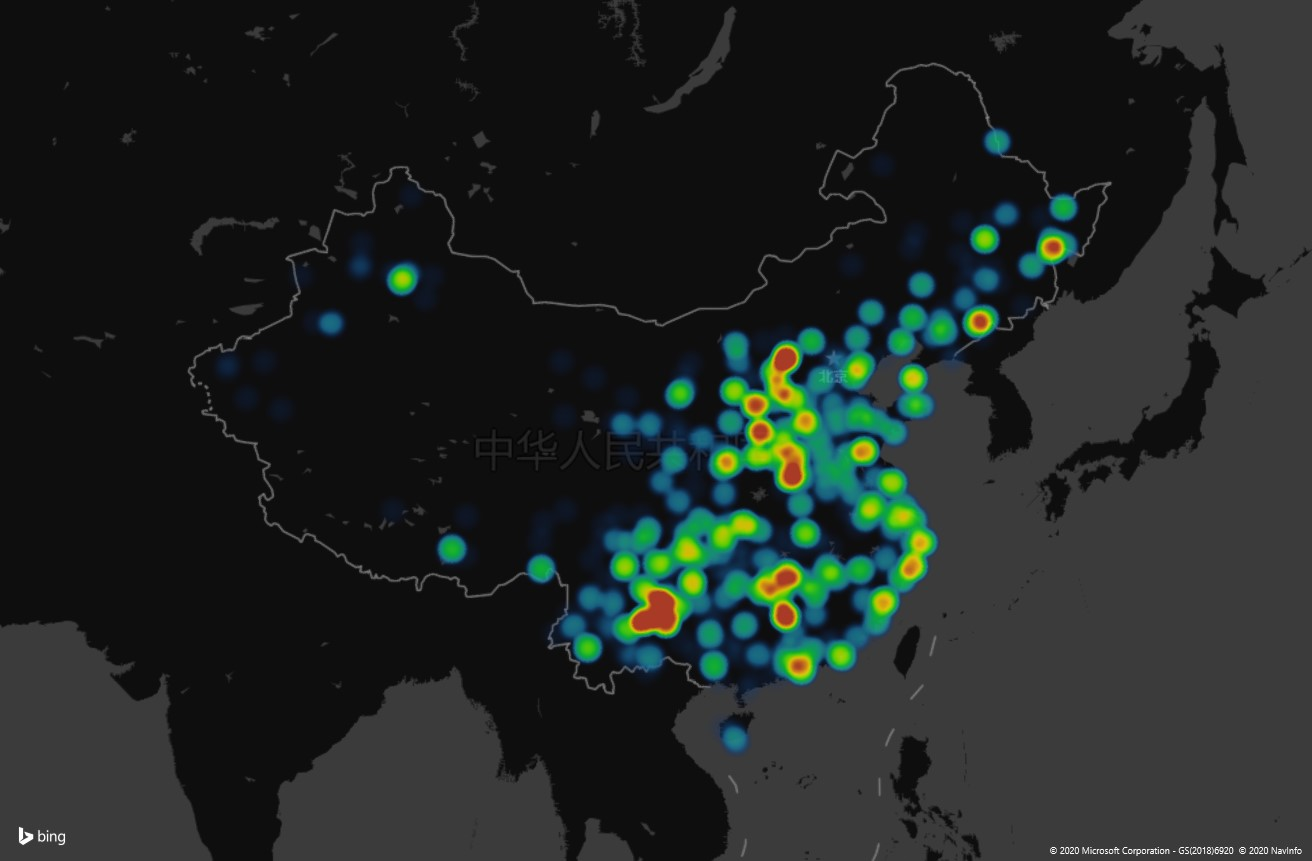

In [29]:
from IPython.display import Image
Image(r'D:\paper\safety\2005-2019_img\hot-spot.jpg')